In [307]:
#importing libraries
import re, os, tqdm, torch, torchvision
import numpy as np, pandas as pd, matplotlib as mpl, matplotlib.pyplot as plt

from torch import nn
from torch.utils.data import DataLoader
from torchvision.transforms import Compose, ToTensor, Normalize

#ignore all warnings
import warnings
warnings.filterwarnings(action= 'ignore')

#set some parameters
mpl.rcParams['figure.figsize'] = [16, 9]

## Fully Connected Layers

## Step 1: Downloading Dataset

In [308]:
transform = Compose([
    ToTensor(),  # Converts to [0.0, 1.0] #Normalization
    Normalize(mean= (0.5,), std= (0.5,))  # Scales to [-1.0, 1.0] #Standart Scaler new_val = (val - mean) / std
  ])

train_data = torchvision.datasets.FashionMNIST(root= './data',
                                               train= True,
                                               download= True,
                                               transform= transform)  #totensor converts images to tensors

test_data = torchvision.datasets.FashionMNIST(root= './data',
                                       train= False,
                                       download= True,
                                       transform= transform)

train_data_loader = DataLoader(train_data, shuffle= True, batch_size= 64)
test_data_loader = DataLoader(test_data, shuffle= True, batch_size= 64)

In [309]:
train_data.classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

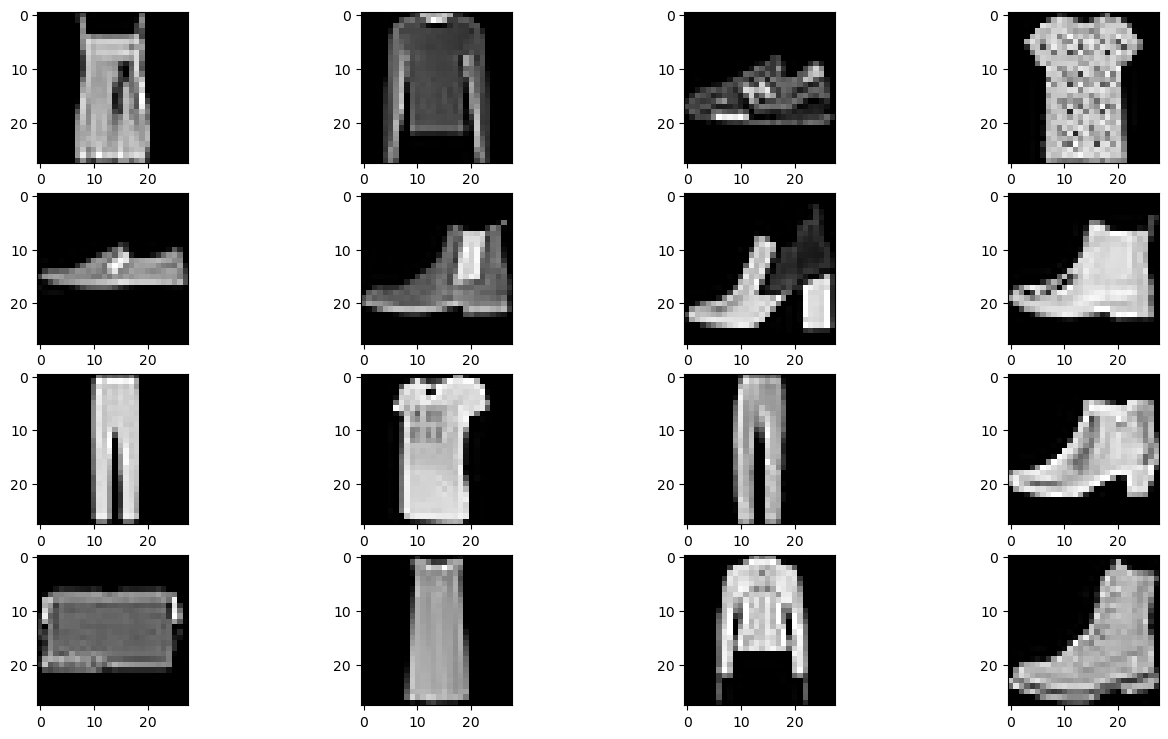

In [310]:
fig, ax = plt.subplots(nrows= 4, ncols= 4)

for row in ax:
    for col in row:
        idx= np.random.randint(0, len(train_data) - 1)
        col.imshow(train_data.data[idx], cmap= 'gray')
#         ax.title('Fashion MNIST', fontsize = 20)
plt.show()

# Step 2: Creating model

###### 3 esas activaetion function var:
1. ReLu ------- input hidden layerlarda - formula = max(0, x)
2. Sigmoid(Logistic) ---------- output layer Binary Classification
3. Softmax --------- output layer MultiClass Classification (her bir class a proba atir)

###### SGD mentiqi ile
new_w = weight - learning_rate * slope

In [321]:
# let's create a model
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__() #first 3 lines are fixed
        self.flatten = nn.Flatten() #Dense or Linear layers expects 1 Dimensional array
        self.linear_relu_stack = nn.ModuleList(
        nn.Linear(28 * 28, 1024), #input layer
        nn.ReLU(),        #activation func
        nn.Linear(1024, 2048), #hidden layer
        nn.ReLU(), 
        nn.Linear(2048, 4096), #hidden layer
        nn.ReLU(), 
        nn.Linear(4096, 2048), #hidden layer
        nn.ReLU(),
        nn.Linear(2048, 10),
        nn.Softmax()),
        
        
    def forward(self, X):
        X = self.flatten(X)
        logits = self.linear_relu_stack(X)
        return logits
    
dense_model = NeuralNetwork()

In [320]:
dense_model

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
)

## Step 3: Training Stage

In [322]:
epochs = 10
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params= model.parameters(), lr= 0.01) #Stochastic Gradient Descent

In [26]:
for epoch in range(epochs):    
    for idx, batch in enumerate(train_data_loader):
        batch_images = batch[0] 
        batch_y = batch[1]
        predictions = model(batch_images)
        loss = loss_function(predictions, batch_y)

        #backward
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if idx % 150 == 0 and idx != 0:
            print(f"Epoch {epoch+1}-----------> Loss for {idx}th batch: {loss}")

Epoch 1-----------> Loss for 150th batch: 2.414275646209717
Epoch 1-----------> Loss for 300th batch: 2.351775646209717
Epoch 1-----------> Loss for 450th batch: 2.367400646209717
Epoch 1-----------> Loss for 600th batch: 2.383025646209717
Epoch 1-----------> Loss for 750th batch: 2.351775646209717
Epoch 1-----------> Loss for 900th batch: 2.351775646209717
Epoch 2-----------> Loss for 150th batch: 2.383025646209717
Epoch 2-----------> Loss for 300th batch: 2.336150646209717
Epoch 2-----------> Loss for 450th batch: 2.414275646209717
Epoch 2-----------> Loss for 600th batch: 2.336150646209717
Epoch 2-----------> Loss for 750th batch: 2.351775646209717
Epoch 2-----------> Loss for 900th batch: 2.398650646209717
Epoch 3-----------> Loss for 150th batch: 2.351775646209717
Epoch 3-----------> Loss for 300th batch: 2.414275646209717
Epoch 3-----------> Loss for 450th batch: 2.383025646209717
Epoch 3-----------> Loss for 600th batch: 2.351775646209717
Epoch 3-----------> Loss for 750th batch


KeyboardInterrupt



## Step 4: Testing Stage

In [323]:
accuracy_score = 0

model.eval()
for idx, test_batch in enumerate(test_data_loader):
    test_batch_y = test_batch[1]
    test_batch_images = test_batch[0]
    
    test_predictions_probas = model(test_batch_images)
    test_predictions = test_predictions_probas.argmax(1)
    
    batch_accuracy = (test_predictions == test_batch_y).sum()
    accuracy_score+= batch_accuracy
    
    if idx % 25 == 0 and idx != 0:
        print(f"Accuracy Score for {idx * 64}: {accuracy_score} ")
    
print(f"\nAccuracy Score: {round(float(accuracy_score / len(test_data.data)), 2)}")

## Evaliuate a model (with function)

In [46]:
classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

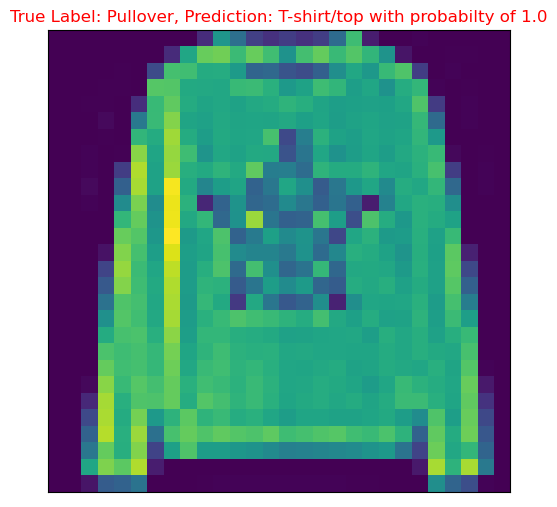

In [52]:
plt.figure(figsize= (12, 6))
classes = test_data.classes
random_idx = np.random.randint(0, len(test_data) - 1)
label = test_data.targets[random_idx].item()
random_image = test_data.data[random_idx]
random_image  = random_image.to(torch.float32)
model_proba = model(random_image.view(-1, 28* 28)).max().item()
prediction = classes[model(random_image.view(-1, 28* 28)).argmax().item()]
plt.imshow(random_image)
# plt.title(f'Real: {classes[label]} -------->>>>> Prediction: {prediction}', fontsize= 12)
if prediction == classes[label]:
    c = 'g'
else:
    c = 'r'

plt.title("True Label: {}, Prediction: {} with probabilty of {}".format(classes[label],
                                                   prediction,
                                                   model_proba),
           color = c)
plt.xticks([])
plt.yticks([])
plt.show()


## Modelling with Convolutional Layers

#### You can use this formula [(W−K+2P)/S]+1.

* W is the input volume 
* K is the Kernel size 
* P is the padding 
* S is the stride

## Creating Architecture

In [78]:
# let's create a model
class CNN_Architecture(nn.Module):
    def __init__(self):
        super(CNN_Architecture, self).__init__() #first 3 lines are fixed
        
        
        self.conv_layer1 = nn.Conv2d(in_channels= 1, out_channels= 32,  #1 demekdir ki, rengsizdi shekil
                                     kernel_size= (3, 3),               #RGB olsaydi 3 yazmali idiz
                                     stride= 1)    #output_image_shape = [32, 26, 26]
        
        self.batch_norm1 = nn.BatchNorm2d(num_features= 32) #Normalization Technique
        
        self.conv_layer2 = nn.Conv2d(in_channels= 32, out_channels= 32,
                                     kernel_size= (3, 3),
                                     stride= 1)   #output_image_shape = [32, 24 , 24]
        
        self.batch_norm2 = nn.BatchNorm2d(num_features= 32)
        
        self.max_pool_1 = nn.MaxPool2d(kernel_size= (2, 2)) #output_image_shape = [32, 12, 12]
        
        
        self.conv_layer3 = nn.Conv2d(in_channels= 32, out_channels= 64,
                                     kernel_size= (3, 3)) #output_image_shape = [64, 10, 10]
        
        self.batch_norm3 = nn.BatchNorm2d(num_features= 64)
        
        self.conv_layer4 = nn.Conv2d(in_channels= 64, out_channels= 64,
                                     kernel_size= (3, 3)) #output_image_shape = [64, 8, 8]
        self.batch_norm4 = nn.BatchNorm2d(num_features= 64)
        
        self.max_pool_2 = nn.MaxPool2d(kernel_size= (2, 2)) #output_image_shape = [64, 4, 4]
        
        self.flatten_layer = nn.Flatten()
        
        self.dense_layer1 = nn.Linear(in_features= 64 * 4 * 4, out_features= 1024) #64 * 4 * 4
        
        self.dense_layer2 = nn.Linear(in_features= 1024, out_features= 512) 
        
        self.output_layer = nn.Linear(in_features= 512, out_features= 10)
        
        self.relu_act_func = nn.ReLU()
        self.softmax_activate_fc = nn.Softmax()
        
        
    def forward(self, X):
        #CNN Layer 1
        X = self.conv_layer1(X)
        
        #Batch Normalization Layer 1
        X = self.batch_norm1(X)
        X = self.relu_act_func(X)
        
        #CNN Layer 2
        X = self.conv_layer2(X)
        
        #Batch Normalization Layer 2
        X = self.batch_norm2(X)
        X = self.relu_act_func(X)
        
        #Max Pooling
        X = self.max_pool_1(X) #maxpool doesnt need activate fc
        
        #CNN Layer 3
        X = self.conv_layer3(X)
        
        #Batch Normalization Layer 3
        X = self.batch_norm3(X)
        X = self.relu_act_func(X)
   
        #CNN Layer 4
        X = self.conv_layer4(X)
        
        #Batch Normalization Layer 4
        X = self.batch_norm4(X)
        X = self.relu_act_func(X)
            
        X = self.max_pool_2(X)
        
        #Flatten Layer
        X = self.flatten_layer(X)
        
        #Dense Layer 1
        X = self.dense_layer1(X)
        X = self.relu_act_func(X)
        
        #Dense Layer 2
        X = self.dense_layer2(X)
        X = self.relu_act_func(X)
        
        #Output Layer
        X = self.output_layer(X)
        X = self.softmax_activate_fc(X)
        
        return X
    
cnn_model = CNN_Architecture()
cnn_model

CNN_Architecture(
  (conv_layer1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
  (batch_norm1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv_layer2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1))
  (batch_norm2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (max_pool_1): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  (conv_layer3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (batch_norm3): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv_layer4): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1))
  (batch_norm4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (max_pool_2): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  (flatten_layer): Flatten(start_dim=1, end_dim=-1)
  (dense_layer1): Linear(in_features=1024, out_features=1024, bias=True)


## Trainin Process

In [79]:
#setting up parameters
BATCH_SIZE = 64
train_data_loader = DataLoader(train_data, batch_size= BATCH_SIZE, shuffle= True)
test_data_loader = DataLoader(test_data, batch_size= BATCH_SIZE, shuffle= False)

epochs = 15
LR_RATE = 0.01
MOMENTUM = 0.9
loss_fc = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(cnn_model.parameters(),
                            lr = LR_RATE,
                            momentum= 0.9,
                            weight_decay= 0.0001)

In [80]:
for epoch_n in range(1, epochs + 1):  
    print(f"\nEpoch {epoch_n}\n-------------------------------")
    cnn_model.train()
    for idx, (X, y) in enumerate(train_data_loader):
        predictions = cnn_model(X)
        loss = loss_fc(predictions, y)
        
         # Backpropagation
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        
        if idx % 100 == 0 and idx != 0:
            
            print(f"Loss {idx}th: {round(loss.item(), 2)}")


Epoch 1
-------------------------------
Loss 100th: 2.01
Loss 200th: 1.68
Loss 300th: 1.69
Loss 400th: 1.61
Loss 500th: 1.71
Loss 600th: 1.66
Loss 700th: 1.69
Loss 800th: 1.61
Loss 900th: 1.72

Epoch 2
-------------------------------
Loss 100th: 1.67
Loss 200th: 1.61
Loss 300th: 1.7
Loss 400th: 1.6
Loss 500th: 1.64
Loss 600th: 1.61
Loss 700th: 1.58
Loss 800th: 1.6
Loss 900th: 1.67

Epoch 3
-------------------------------
Loss 100th: 1.63
Loss 200th: 1.62
Loss 300th: 1.6
Loss 400th: 1.53
Loss 500th: 1.58
Loss 600th: 1.62
Loss 700th: 1.62
Loss 800th: 1.7
Loss 900th: 1.73

Epoch 4
-------------------------------
Loss 100th: 1.59
Loss 200th: 1.52
Loss 300th: 1.6
Loss 400th: 1.68
Loss 500th: 1.62
Loss 600th: 1.54
Loss 700th: 1.61
Loss 800th: 1.54
Loss 900th: 1.68

Epoch 5
-------------------------------
Loss 100th: 1.63
Loss 200th: 1.63
Loss 300th: 1.62
Loss 400th: 1.67
Loss 500th: 1.64
Loss 600th: 1.53
Loss 700th: 1.62
Loss 800th: 1.57
Loss 900th: 1.61

Epoch 6
---------------------------

## Testing

In [81]:
accuracy_value = 0
test_size = test_data.data.shape[0]

cnn_model.eval()
with torch.no_grad():
    for idx, (X, y) in enumerate(test_data_loader):
        predictions = cnn_model(X)
        accuracy_value += (predictions.argmax(1) == y).sum().item()
        if idx % 25 == 0 and idx != 0:  
            print(f"Accuracy Value: {accuracy_value} out of {idx  * 64}") 

    print(f"\nAccuracy Score: {round((accuracy_value / test_size) * 100, 2)}")

Accuracy Value: 1530 out of 1600
Accuracy Value: 2990 out of 3200
Accuracy Value: 4451 out of 4800
Accuracy Value: 5923 out of 6400
Accuracy Value: 7388 out of 8000
Accuracy Value: 8856 out of 9600

Accuracy Score: 91.64999999999999


## Make Predictions.

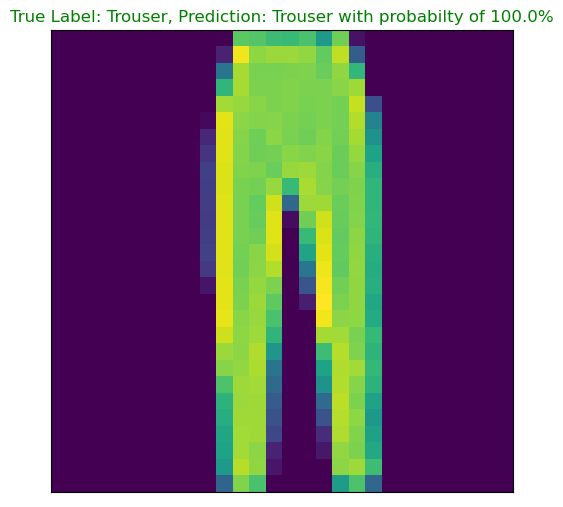

In [298]:
plt.figure(figsize= (12, 6))
classes = test_data.classes
random_idx = np.random.randint(0, len(test_data) - 1)
label = test_data.targets[random_idx].item()
random_image = test_data.data[random_idx]
random_image  = random_image.to(torch.float32)
normalized_random_image = random_image / 255
standart_random_image = (normalized_random_image - 0.5) / 0.5
model_proba = cnn_model(standart_random_image.view(1, 1, 28, 28)).max().item()
prediction = classes[cnn_model(standart_random_image.view(1, 1, 28, 28)).argmax().item()]
plt.imshow(random_image)
plt.title(f'Real: {classes[label]} -------->>>>> Prediction: {prediction}', fontsize= 12)
if prediction == classes[label]:
    c = 'g'
    image_title = "True Label: {}, Prediction: {} with probabilty of {}%".format(classes[label],
                                                   prediction,
                                                   round(model_proba * 100, 2))    
    
else:
    c = 'r'
    true_label_proba = cnn_model(standart_random_image.view(1, 1, 28, 28)).reshape(10)[label].item()
    image_title = "True Label: {} {}, Prediction: {} {}".format(classes[label],
                                                                round(true_label_proba * 100, 2),
                                                                prediction,
                                                                round(model_proba * 100, 2))
plt.title(image_title, color = c)
plt.xticks([])
plt.yticks([])
plt.show()